<a href="https://colab.research.google.com/github/Pilli-Venkat/Data-Analysis-on-Olympics-Dataset/blob/main/Olympics_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# importing data sets

atheletes : https://drive.google.com/file/d/1_Q0X64_fr4zapuoIZrgWdX79bTZX3Ki0/view?usp=sharing

noc : https://drive.google.com/file/d/1_Q0X64_fr4zapuoIZrgWdX79bTZX3Ki0/view?usp=sharing

In [ ]:
athletes = pd.read_csv("/content/drive/MyDrive/data sets/athlete_events.csv")
noc = pd.read_csv("/content/drive/MyDrive/data sets/noc_regions.csv")

# Copy of Data Frames

In [ ]:
ath = athletes.copy()
nat = noc.copy()

# Data Exploration

# 

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
ath.shape

(271116, 15)

In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
print(f"Total number of null values in athlete data set: {ath.isnull().sum().sum()}")

Total number of null values in athlete data set: 363853


In [ ]:
nat.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,TCH,Germany,South Yemen
freq,1,4,1


In [ ]:
nat.shape

(230, 3)

In [ ]:
nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [ ]:
nat.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [ ]:
print(f"Total number of null values in NOC data set: {nat.isnull().sum().sum()}")

Total number of null values in NOC data set: 212


1. Add a new column "region" to the ath DataFrame. And the region column should have the regions according to the elements in the NOC columns of the "nat" DataFrame.

In [ ]:
region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7,'region',region_col)

ValueError: ignored

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


2. Drop the columns "NOC" from the DataFrame "ath"

In [ ]:
ath.drop(columns=['NOC'],inplace=True)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,Poland,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


3.Handling the null values in the columns - "Age", "Height" & "Weight" by the mean of the respective columns.

In [ ]:
print(f"Total null values in age : {ath['Age'].isnull().sum()}")

Total null values in age : 9474


In [ ]:
ath[ath['Age'].isnull()].head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,Iran,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,Bulgaria,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,Bulgaria,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,Sudan,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,Egypt,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [ ]:
ath['Age'].fillna(np.mean(ath['Age']),inplace=True)

In [ ]:
ath.loc[[153]]

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
153,58,Georgi Abadzhiev,M,25.556898,NaN,NaN,Bulgaria,Bulgaria,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN


In [ ]:
print(f"Total null values in age : {ath['Age'].isnull().sum()}")

Total null values in age : 0


In [ ]:
ath['Height'].fillna(np.mean(ath['Height']),inplace=True)

In [ ]:
ath['Weight'].fillna(np.mean(ath['Weight']),inplace=True)

In [ ]:
ath['Height'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Height, Length: 271116, dtype: bool

* 4. Handling the null values in the column "Medals"

In [ ]:
print(f"Total null values in medal column {ath['Medal'].isna().sum()}")

Total null values in medal column 231333


In [ ]:
ath['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
ath['Medal'].nunique()

3

In [ ]:
ath.replace([np.nan],[0],inplace=True)

In [ ]:
print(f"Total null values in the entire data set are {ath.isnull().sum().sum()}")

Total null values in the entire data set are 0


* Dropping unwanted columns

In [ ]:
ath.drop(["region","Games"],axis = 1,inplace =True)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,25.556898,25.556898,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,25.556898,25.556898,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.000000,89.000000,Poland-1,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.000000,59.000000,Poland,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.000000,96.000000,Poland,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [ ]:
ath['Year'].min()

1896

In [ ]:
ath['Year'].max()

2016

In [ ]:
ath['Age'].dtype

dtype('float64')

* Changing d type of age into int

In [ ]:
ath['Age']=ath['Age'].astype(int)

In [ ]:
ath['Age'].dtype

dtype('int64')

# Data Analysis

* Show the relationship between Height and Weight

Text(0, 0.5, 'Weight')

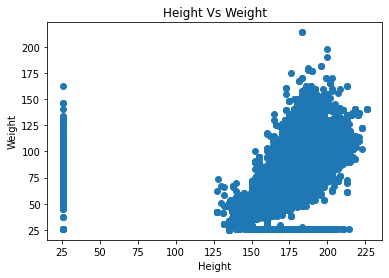

In [ ]:
plt.scatter(ath['Height'],ath['Weight'])
plt.title('Height Vs Weight')
plt.xlabel("Height")
plt.ylabel("Weight")

* Find out how many male and female had participated in the Olympics during 1896 to 2016

In [ ]:
print(f"Total Male candiates {[ath['Gender'].value_counts()][0][0]}")

Total Male candiates 196594


In [ ]:
print(f"Total Female candiates {[ath['Gender'].value_counts()][0][1]}")

Total Female candiates 74522


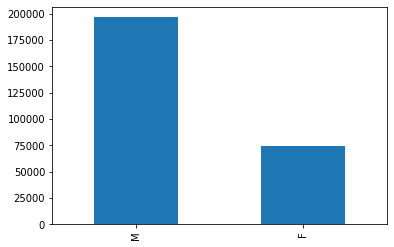

In [ ]:
ath['Gender'].value_counts().plot.bar(ath['Gender'])

* How many Male and Female have participated in the Summer and Winter Olympics

In [ ]:
ath['Season'].value_counts()


Summer    222552
Winter     48564
Name: Season, dtype: int64

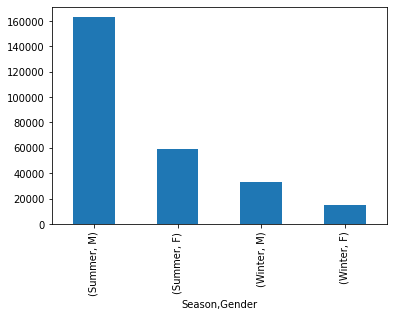

In [ ]:
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])

* Name the Top 5 countries who have the most medals

In [156]:
ath['Medal'].unique()

array([0, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [160]:
ath['Medal'].replace('Gold',1,inplace=True)
ath['Medal'].replace('Bronze',2,inplace = True)
ath['Medal'].replace('Silver',3,inplace = True)


In [171]:
print("Top five countries having more medals ")
(ath.groupby(['Team'])['Medal'].sum()).sort_values(ascending = False).head()

Top five countries having more medals 


Team
United States    9476
Soviet Union     4560
Germany          3916
Great Britain    3409
France           3163
Name: Medal, dtype: int64

Text(0.5, 1.0, 'Top five countries having more medals')

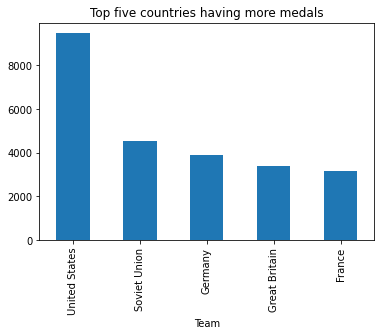

In [175]:
(ath.groupby(['Team'])['Medal'].sum()).sort_values(ascending = False).head().plot.bar(ath['Team'])
plt.title("Top five countries having more medals")

In [176]:
# Export to JSON
ath.to_json("athletes_dataset.json")

# Export to Excel
ath.to_excel("athletes_dataset.xlsx")

# Export to .CSV
ath.to_csv("athletes_dataset.csv")